# Cats vs Dog image classification Using CNN's 



In [29]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [6]:
# This dataset is taken from https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset if this link dont work 
#visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset



In [33]:
source_path = 'PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


In [34]:
# Define root directory
root_dir = 'Dataset'
root_dir

'Dataset'

lets create  subdirectories for training
and testing. 

In [35]:



# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    
    shutil.rmtree(root_dir)


def create_train_test_dirs(root_path):    
    
    train_dir = os.path.join(root_path, 'training')   
    test_dir = os.path.join(root_path, 'testing')
    
    # Directory with training cat/dog pictures
    train_cats_dir = os.path.join(train_dir, 'cats')
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    
    # Directory with testing cat/dog pictures
    test_cats_dir = os.path.join(test_dir, 'cats')
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    to_create = [root_path,train_dir,test_dir,train_cats_dir,train_dogs_dir,test_cats_dir,test_dogs_dir ]  
    for directory in to_create:        
        try:            
            os.mkdir(directory)
            print(directory, '--created')
        except:
            print(directory, '--failed')
 
    pass

    

try:
    
    create_train_test_dirs(root_path=root_dir)
except FileExistsError:
    
    print("You should not be seeing this since the upper directory is removed beforehand")

Dataset created
Dataset\training created
Dataset\testing created
Dataset\training\cats created
Dataset\training\dogs created
Dataset\testing\cats created
Dataset\testing\dogs created


In [37]:
# Test our created directories 

for rootdir, dirs, files in os.walk(root_dir):
    
    for subdir in dirs:
        
        print(os.path.join(rootdir, subdir))

Dataset\testing
Dataset\training
Dataset\testing\cats
Dataset\testing\dogs
Dataset\training\cats
Dataset\training\dogs


In [40]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name
        if os.path.getsize(file_path):            
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)
    pass



In [41]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "PetImages/Cat/"
DOG_SOURCE_DIR = "PetImages/Dog/"

TRAINING_DIR = "Dataset/training/"
TESTING_DIR = "Dataset/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:    
    for file in os.scandir(TRAINING_CATS_DIR):        
        os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
    for file in os.scandir(TRAINING_DOGS_DIR):        
        os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
    for file in os.scandir(TESTING_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
    for file in os.scandir(TESTING_DOGS_DIR):
        os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


In [42]:
#let use flow_from_directory to Normalize resoluation of images 
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    
    # Instantiate the ImageDataGenerator class and  rescale argument
    train_datagen = ImageDataGenerator(rescale=1 / 255)

    # Pass in the appropiate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

    # Instantiate the ImageDataGenerator class and  rescale argument
    validation_datagen = ImageDataGenerator(rescale=1 / 255)

    # Pass in the appropiate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  
    return train_generator, validation_generator


In [43]:
# Test our generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [46]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.988:
            
            print("\nReached 98.8% accuracy so cancelling training!")
            self.model.stop_training = True
            
                
                


In [47]:
 # Let build our KERAS MODEL TO CLASSIFY CATS V DOGS USEING 3 CONVOLUTION LAYERS


from tensorflow.keras.optimizers import RMSprop
def create_model():
    
    model = tf.keras.models.Sequential([                                       
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

  
    model.compile(optimizer=RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  

    return model


In [59]:
import warnings
warnings.filterwarnings('ignore')
print('warnings ignored')

warnings ignored


In [49]:

model = create_model()
# Instantiate the callback class so that traing will be stop after 98% of accuracy
callbacks = myCallback()

# Train the model

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/15
352/352 [==============================] - 458s 1s/step - loss: 0.6519 - accuracy: 0.6539 - val_loss: 0.5093 - val_accuracy: 0.7524
Epoch 2/15
352/352 [==============================] - 326s 926ms/step - loss: 0.5066 - accuracy: 0.7498 - val_loss: 0.4563 - val_accuracy: 0.7836
Epoch 3/15
352/352 [==============================] - 277s 787ms/step - loss: 0.4363 - accuracy: 0.7980 - val_loss: 0.4264 - val_accuracy: 0.8048
Epoch 4/15
352/352 [==============================] - 270s 767ms/step - loss: 0.3756 - accuracy: 0.8293 - val_loss: 0.3914 - val_accuracy: 0.8184
Epoch 5/15
352/352 [==============================] - 233s 663ms/step - loss: 0.3111 - accuracy: 0.8646 - val_loss: 0.4063 - val_accuracy: 0.8196
Epoch 6/15
352/352 [==============================] - 227s 646ms/step - loss: 0.2343 - accuracy: 0.9019 - val_loss: 0.4908 - val_accuracy: 0.8160
Epoch 7/15
352/352 [==============================] - 150s 426ms/step - loss: 0.1620 - accuracy: 0.9376 - val_loss: 0.6064 - va

In [51]:

def plot_loss_acc(history):
    
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs=range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.plot(epochs, acc, 'r', "Training Accuracy")
    plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
    plt.title('Training and validation accuracy')
    plt.show()
    print("")

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.plot(epochs, loss, 'r', "Training Loss")
    plt.plot(epochs, val_loss, 'b', "Validation Loss")
    plt.show()

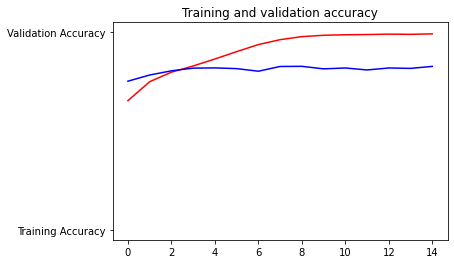

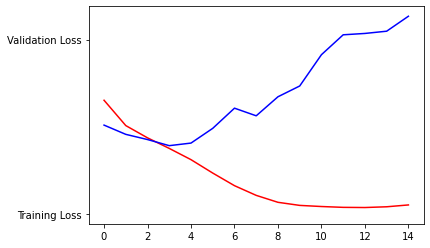

In [52]:
# Plot training results
plot_loss_acc(history)

####  we encounter that the model is overfitting, which means that it is doing a great job at classifying the images in the training set but struggles with new data.



In [ ]:
#one way to solve this problem is by using data augmentation
#we update ImageDatagenerator for data augmentation

In [53]:
def train_val_generators_DataAug(TRAINING_DIR, VALIDATION_DIR):
    
    # Instantiate the ImageDataGenerator class and  rescale argument
    train_After_datagen = ImageDataGenerator(rescale=1 / 255,
                                     rotation_range=40,
                                     width_shift_range=.2,
                                     height_shift_range=.2,
                                     shear_range=.2,
                                     zoom_range=.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

    # Pass in the appropiate arguments to the flow_from_directory method
    train_After_generator = train_After_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

    # Instantiate the ImageDataGenerator class and  rescale argument
    validation_After_datagen = ImageDataGenerator(rescale=1 / 255)

    # Pass in the appropiate arguments to the flow_from_directory method
    validation_After_generator = validation_After_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=64,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  
    return train_After_generator, validation_After_generator

In [54]:
train_After_generator, validation_After_generator = train_val_generators_DataAug(TRAINING_DIR, TESTING_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [57]:

from tensorflow.keras.optimizers import RMSprop
def create_model2():
    callbacks = [myCallback()]    
    model2 = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])

  
    model2.compile(optimizer=RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

    return model2

In [61]:
# Get the untrained model
model2 = create_model2()

# Train the model
# Note that this may take some time.
history2 = model2.fit(train_After_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_After_generator,                    
                    callbacks=callbacks)

Epoch 1/15
352/352 [==============================] - 324s 920ms/step - loss: 0.6903 - accuracy: 0.5768 - val_loss: 0.5891 - val_accuracy: 0.6972
Epoch 2/15
352/352 [==============================] - 294s 837ms/step - loss: 0.6185 - accuracy: 0.6569 - val_loss: 0.5628 - val_accuracy: 0.6996
Epoch 3/15
352/352 [==============================] - 365s 1s/step - loss: 0.5849 - accuracy: 0.6963 - val_loss: 0.5519 - val_accuracy: 0.7132
Epoch 4/15
352/352 [==============================] - 384s 1s/step - loss: 0.5457 - accuracy: 0.7252 - val_loss: 0.5289 - val_accuracy: 0.7120
Epoch 5/15
352/352 [==============================] - 359s 1s/step - loss: 0.5082 - accuracy: 0.7553 - val_loss: 0.4026 - val_accuracy: 0.8164
Epoch 6/15
352/352 [==============================] - 311s 884ms/step - loss: 0.4862 - accuracy: 0.7711 - val_loss: 0.3778 - val_accuracy: 0.8284
Epoch 7/15
352/352 [==============================] - 324s 921ms/step - loss: 0.4569 - accuracy: 0.7862 - val_loss: 0.3436 - val_accu

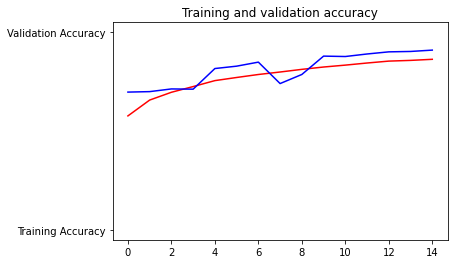

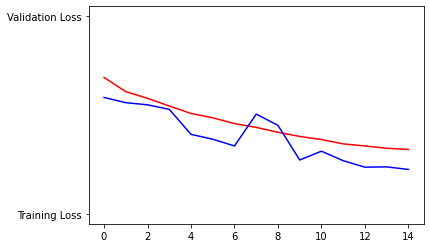

In [62]:
plot_loss_acc(history2)